# Fermi Surface

Here code examples for Fermi surfaces are given. Fermi surfaces are band structures in 3D, i.e. distributions of $E(k)$ in the first Brillouin zone (1BZ). Therefore methods are similar to band structures, i.e. projections of $E(k)$ along the high symmetry lines of 1BZ. For band structures, please refer to the [Electronic Structure examples](https://crystal-code-tools.github.io/CRYSTALpytools/examples/electronic_structure/electronic_structure.html).

**NOTE**

For 3D and 2D systems only.

## The 'read_Fermi_surface()' method

This method is defined in the `crystal_io.Properties_output` class. The fort.35 file generated by the 'DLV_BAND' keyword, which specifies the min and max band numbers and the size of k mesh.

The screen output ('out' or 'outp') is strongly suggested to get Fermi energy. Otherwise the data in fort.35 is used, rather than the energy aligned to $E_{F}=0$.

$E(k)$ is saved by a grid defined in reciprocal unit cell, rather than the grid defined in 1BZ.

**NOTE**

A general (non-periodic) grid is used, which is different from the CRYSTAL input and consistent with the real-space grids defined in CRYSTALpytools. Therefore the last element is repeated and the grid is expanded along the periodic directions by 1.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

fsurf = Properties_output('fsurf_graphene.out').read_Fermi_surface('fsurf_graphene.f35')

print('Graphene Fermi energy = {:.2f} {}'.format(fsurf.efermi, fsurf.unit))
print('Graphene grid size = Z {:d} Y {:d} X {:d}'.format(fsurf.bands.shape[1],
                                                         fsurf.bands.shape[2],
                                                         fsurf.bands.shape[3]))
print('Graphene nband = {:d}'.format(fsurf.bands.shape[0]))
print('Graphene spin = {:d}'.format(fsurf.bands.shape[-1]))

Graphene Fermi energy = -2.66 eV
Graphene grid size = Z 1 Y 25 X 25
Graphene nband = 12
Graphene spin = 1


For spin-polarized cases, the last dimension is doubled.

In [2]:
from CRYSTALpytools.crystal_io import Properties_output

fspin = Properties_output('fsurf_hematite.out').read_Fermi_surface('fsurf_hematite.f35')

print('Hematite Fermi energy = {:.2f} {}'.format(fspin.efermi, fspin.unit))
print('Hematite grid size = Z {:d} Y {:d} X {:d}'.format(fspin.bands.shape[1],
                                                         fspin.bands.shape[2],
                                                         fspin.bands.shape[3]))
print('Hematite nband = {:d}'.format(fspin.bands.shape[0]))
print('Hematite spin = {:d}'.format(fspin.bands.shape[-1]))

Hematite Fermi energy = -4.03 eV
Hematite grid size = Z 25 Y 25 X 25
Hematite nband = 4
Hematite spin = 2


## The 'electronics.FermiSurface' class

This class includes object-oriented methods for data analysis and quick plotting.

### The 'get_bandgap()' method and 'bandgap' attribute

Similar to `electronics.ElectronBand` class, this attribute gets VBM, CBM and band gap from $E_{k}$.

**NOTE**

VBM/CBM are judged purely by the energies of bands. VBM/CBM might be inaccurate or meanless for conducting systems. See the following example.

In [3]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_Mg.f35', 'fsurf_Mg.out')
print('Mg band gap = {:.2f} {}'.format(fsurf.bandgap, fsurf.unit))

_, _, _, pos = fsurf.get_bandgap()
print('VBM position: X {:.4f} Y {:.4f} Z {:.4f}'.format(pos[0, 0], pos[0, 1], pos[0, 2]))
print('CBM position: X {:.4f} Y {:.4f} Z {:.4f}'.format(pos[1, 0], pos[1, 1], pos[1, 2]))

Mg band gap = 0.00 eV
VBM position: X 0.0000 Y 0.0000 Z 0.1065
CBM position: X 1.2037 Y 0.6950 Z 0.6388


For spin-polarized cases, this method returns to VBM/CBM of $\alpha$ and $\beta$ states separately.

In [4]:
from CRYSTALpytools.electronics import FermiSurface

fspin = FermiSurface.from_file('fsurf_hematite.f35', 'fsurf_hematite.out')
print('Hemitate alpha band gap = {:.2f} {}'.format(fspin.bandgap[0], fspin.unit))

_, vbm, cbm, _ = fspin.get_bandgap()
print('Alpha VBM = {:.4f} {}'.format(vbm[0], fspin.unit))
print('Beta CBM = {:.4f} {}'.format(cbm[1], fspin.unit))

Hemitate alpha band gap = 3.52 eV
Alpha VBM = 0.0026 eV
Beta CBM = 3.5176 eV


### The 'to_bxsf()' method

This method writes data into the BXSF formatted file used by [XCrySDen's Fermi surface viewer](http://www.xcrysden.org/doc/fermi.html). Currently only 3D systems are supported by BXSF format.

Use the `band_index` option (starting from 1) to specify the band to dump. For spin-polarized systems, attach 'a' or 'b' for $\alpha$ or $\beta$ states.

In [5]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_hematite.f35', 'fsurf_hematite.out')
fsurf.to_bxsf('fsurf_hematite.bxsf', band_index=['2a', '2b'])

Visualize the valance band, $\alpha$ spin in XCrySDen. The isosurface of -0.3 eV below $E_{F}$ is plotted.

<img src="./fsurf_hematiteBXSF.png" width="640">

## Visualization

The `electronics.FermiSurface.plot()` method plots:

1. For 3D systems, 3D isosurfaces of $E(k)$, , or its distributions if ``volume_3d=True``.  
2. For 2D systems, the distribution of $E(k)$, which is plotted as the 3D surface, with XY plane as 1BZ and Z axis as energy.

**NOTE**
1. [MayaVi](https://docs.enthought.com/mayavi/mayavi/index.html) is required for plotting, which is not installed by default.  
2. Currently it is the only visualization method of CRYSTALpytools. There is no similar methods available in the `plot` module.

### 3D systems - Isosurfaces

1 or multiple surfaces of the same band. `isovalue` accepts list inputs.

A barchart is generated automatically to indicate the isovalues and energy range of band 2a. The band structure is visualized in the pop-up window of MayaVi.

Double the grid size to smoothen the surfaces.

**NOTE**

In some cases grid interpolation might change the band energy range slightly, leading to errors if the isovalue is too close to energy maxima or minima. The user is always suggested to use denser grid during calculation to smoothen data. See the example in 2D system.

(-0.5, 813.5, 675.5, -0.5)

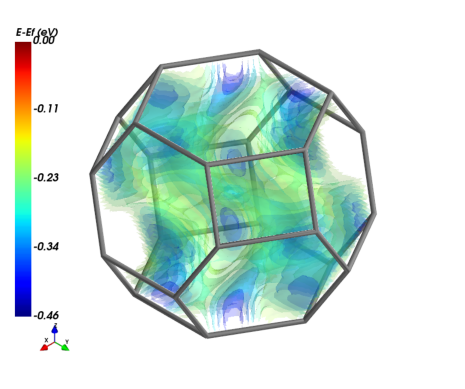

In [1]:
# This code block is only used to generate a nice thumbnail for the example gallary.
# Go the next block
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(plt.imread("./fsurf_hematite.png"))
ax.axis('off')

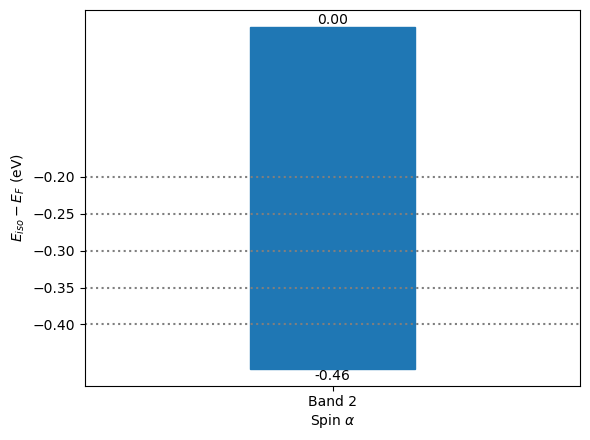

In [2]:
from CRYSTALpytools.electronics import FermiSurface
import numpy as np

fsurf = FermiSurface.from_file('fsurf_hematite.f35', 'fsurf_hematite.out')
fsurf.plot(band_index='2a', isovalue=np.linspace(-0.4, -0.2, 5),
           interp='linear', interp_size=2, opacity=0.2,
           BZ_linewidth=0.5, BZ_color=(0.5, 0.5, 0.5))

1 or multiple bands with the same isovalue. `band_index` accepts list inputs.

Double the grid size to smoothen the surfaces.

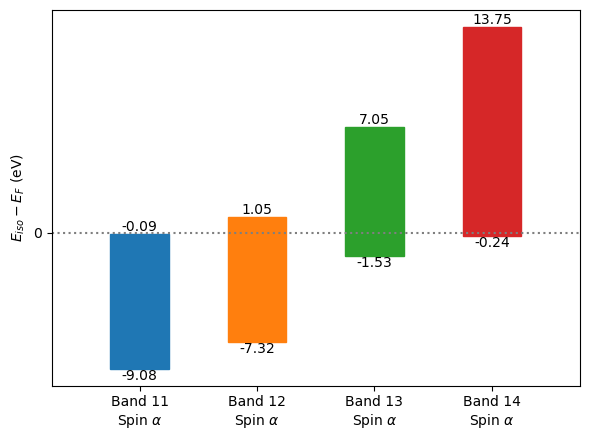

/tmp/ipykernel_17005/2594432941.py:5: UserWarning: Band 11, spin alpha: No isovalue lies in the energy range.
  fsurf.plot(band_index=[11, 12, 13, 14], isovalue=0.,


In [2]:
from CRYSTALpytools.electronics import FermiSurface
import numpy as np

fsurf = FermiSurface.from_file('fsurf_Mg.f35', 'fsurf_Mg.out')
fsurf.plot(band_index=[11, 12, 13, 14], isovalue=0.,
           interp='slinear', interp_size=2)

The 'real' Fermi surface (at Fermi level) of Mg.

<img src="./fsurf_Mg_iso.png" width="480">

Though possible, it is not suggested to have multiple isovalues and multiple bands.

### 3D systems - Volume

With `volume_3d=True` the user can visualize the distribution of $E(k)$ over 1BZ. It takes much longer for non-orthogonal lattice, as it linearly interpolates and resamples the data over a regular grid using [scipy.interpolate.griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html). The grid size is consistent with `interp_size`. If it is not 1, that means 2 interpolations are performed:

1. Interpolate over the denser grid in reciprocal lattice
2. Interpolate the denser grid over the regular (orthogonal, constant spacing) grid.

`isovalue` is disabled.

In [8]:
fsurf = FermiSurface.from_file('fsurf_Mg.f35', 'fsurf_Mg.out')
fsurf.plot(band_index=12, volume_3d=True)

Distribution of valance band in 1BZ.

<img src="./fsurf_Mg_vol.png" width="480">

### 2D systems

For 2D systems, it is possible to plot multiple bands at the same time. `isovalue` is ignored.

Use `BZ_scale` to moderately extend surfaces over the 1BZ boundary for better visualization. **The value must be smaller than 2**.

In [2]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_graphene.f35', 'fsurf_graphene.out')
fsurf._set_unit('a.u.')
fsurf.plot(band_index=[6, 7], BZ_scale=1.5)

Valance and conduction bands show the Dirac cones at K points.

<img src="./fsurf_graphene_nointer.png" width="480">

For comparison the data is interpolated on a 3x denser grid.

In [4]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_graphene.f35', 'fsurf_graphene.out')
fsurf._set_unit('a.u.')
fsurf.plot(band_index=[6, 7], BZ_scale=1.5, interp='linear', interp_size=3)

The accuracy at K is slightly lowered.

<img src="./fsurf_graphene_inter.png" width="480">

### Rendering

By setting `show_the_scene=False`, the MayaVi scene is retured for further modifications. For example, the user can render the interactive scene as obj+mtl formatted files (not always works due to MayaVi).

In [2]:
from CRYSTALpytools.electronics import FermiSurface
from mayavi import mlab

fsurf = FermiSurface.from_file('fsurf_graphene.f35', 'fsurf_graphene.out')
fig = fsurf.plot(band_index=[6, 7], BZ_scale=1.5, show_the_scene=False)
mlab.savefig('fsurf_graphene.obj', figure=fig)
mlab.close()

For more information, please refer to [the API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.electronics.html).